In [340]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import special
import matplotlib as mpl
import matplotlib.pyplot as plt

In [464]:
def simCorn(overallEffect=0, fertilizerEffect=[0,0,0], rowEffect=[0,0,0], colEffect=[0,0,0], seed= None, dist: callable = np.random.normal, **extra):
    n = len(fertilizerEffect)**2

    if type(seed) is not int and seed is not None:
        return print("You entered an invalid seed")


    elif seed is not None:
        np.random.seed(seed)
        dist = dist
        errors = dist(size = (n), **extra)

        fert_vec = np.array(fertilizerEffect)
        row_vec = np.array(rowEffect)
        col_vec = np.array(colEffect)

        fert_vec = np.resize(fert_vec,n)
        row_vec = np.resize(row_vec,n)
        col_vec = np.resize(col_vec,n)
    

        Fertilizer = np.array(["A", "B", "C", "C", "A", "B", "B", "C", "A"])
        Row = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3])
        Column = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])



        Yield = overallEffect + fert_vec + row_vec + col_vec + errors

        data = np.zeros(n, 
                    dtype = {'names': ('Fertilizer', 'Row', 'Column', 'Yield'),
                             'formats': ('U16', 'i8', 'i8', 'f8')})

        data['Fertilizer'] = Fertilizer
        data['Row'] = Row
        data['Column'] = Column 
        data['Yield'] = Yield
    

        x = pd.DataFrame(data = data) 


    elif seed is None:
        dist = dist
        errors = dist(size = (n), **extra)

        fert_vec = np.array(fertilizerEffect)
        row_vec = np.array(rowEffect)
        col_vec = np.array(colEffect)

        fert_vec = np.resize(fert_vec,n)
        row_vec = np.resize(row_vec,n)
        col_vec = np.resize(col_vec,n)
    

        Fertilizer = np.array(["A", "B", "C", "C", "A", "B", "B", "C", "A"])
        Row = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3])
        Column = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])



        Yield = overallEffect + fert_vec + row_vec + col_vec + errors

        data = np.zeros(n, 
                    dtype = {'names': ('Fertilizer', 'Row', 'Column', 'Yield'),
                             'formats': ('U16', 'i8', 'i8', 'f8')})

        data['Fertilizer'] = Fertilizer
        data['Row'] = Row
        data['Column'] = Column 
        data['Yield'] = Yield
    

        x = pd.DataFrame(data = data) 
 
        


        

        return x

        

In [466]:
simCorn()

,Fertilizer,Row,Column,Yield
0,A,1,1,0.441227
1,B,1,2,-0.330870
2,C,1,3,2.430771
3,C,2,1,-0.252092
4,A,2,2,0.109610
5,B,2,3,1.582481
6,B,3,1,-0.909232
7,C,3,2,-0.591637
8,A,3,3,0.187603


In [468]:
mu = 7       
alpha = np.array(1,2,3)
beta = np.array(2,2,1)
gamma = np.array(3,3,2)
y = simCorn(overallEffect=mu, fertilizerEffect=alpha, rowEffect=beta, colEffect=gamma,
              seed=29429, rnorm, mean=3, sd=2)

SyntaxError: positional argument follows keyword argument (3058572527.py, line 6)

In [470]:
sim_1 = simCorn(overallEffect=10, dist=np.random.normal) 
sim_2 = simCorn(overallEffect=10, fertilizerEffect=(1,2,3), rowEffect=(0,0,1), colEffect=(0,0,1), dist=np.random.normal)
sim_3 = simCorn(overallEffect=10, fertilizerEffect=(1,2,3), rowEffect=(1,0,1), colEffect=(0,1,1), dist=np.random.normal)
sim_4 = simCorn(overallEffect=10, fertilizerEffect=(1,2,3), rowEffect=(1,0,1), colEffect=(0,1,1), dist=np.random.normal)
sim_5 = simCorn(overallEffect=10, fertilizerEffect=(1,2,3), rowEffect=(0,0,1), colEffect=(0,0,1), dist=np.random.exponential)
sim_6 = simCorn(overallEffect=10, fertilizerEffect=(1,2,3), rowEffect=(1,0,1), colEffect=(0,1,1), dist=np.random.exponential)
sim_7 = simCorn(overallEffect=10, fertilizerEffect=(1,2,3), rowEffect=(0,1,0), colEffect=(0,1,0), dist=np.random.exponential)

In [472]:
p_vector_1 = np.zeros(100)
np.random.seed(1331)
for i in range(100):
    df = sim_1
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011
 0.07649011 0.07649011 0.07649011 0.07649011 0.07649011 0.0764

In [476]:
p_vector_2 = np.zeros(100)
np.random.seed(18694)
for i in range(100):
    df = sim_2
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736
 0.79839736 0.79839736 0.79839736 0.79839736 0.79839736 0.7983

In [478]:
p_vector_3 = np.zeros(100)
np.random.seed(6516)
for i in range(100):
    df = sim_3
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998
 0.93880998 0.93880998 0.93880998 0.93880998 0.93880998 0.9388

In [488]:
p_vector_4 = np.zeros(100)
np.random.seed(5)
for i in range(100):
    df = sim_4
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839
 0.87824839 0.87824839 0.87824839 0.87824839 0.87824839 0.8782

In [490]:
p_vector_5 = np.zeros(100)
np.random.seed(574)
for i in range(100):
    df = sim_5
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739
 0.87711739 0.87711739 0.87711739 0.87711739 0.87711739 0.8771

In [492]:
p_vector_6 = np.zeros(100)
np.random.seed(9476)
for i in range(100):
    df = sim_6
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681
 0.97840681 0.97840681 0.97840681 0.97840681 0.97840681 0.9784

In [494]:
p_vector_7 = np.zeros(100)
np.random.seed(9743)
for i in range(100):
    df = sim_7
    
    groups = [grp["Yield"].values
              for _, grp in df.groupby("Fertilizer")]
    
    F_stat, p_val = stats.f_oneway(*groups)
    
    p_vector[i] = p_val

print(p_vector)

[0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651
 0.99968651 0.99968651 0.99968651 0.99968651 0.99968651 0.9996

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

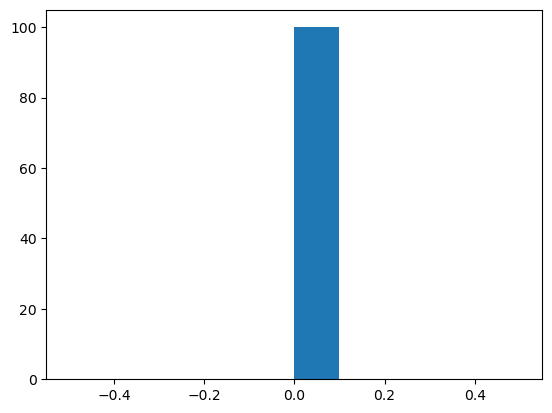

In [511]:
plt.hist(p_vector_1)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

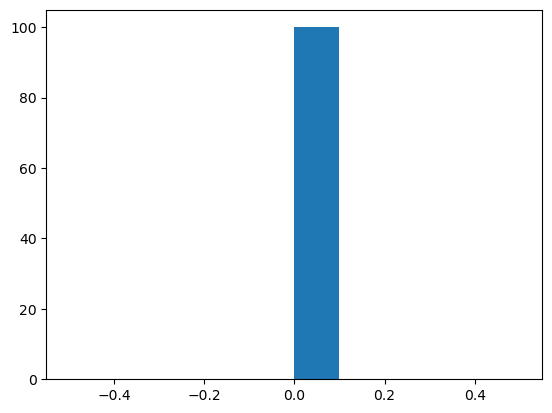

In [513]:
plt.hist(p_vector_2)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

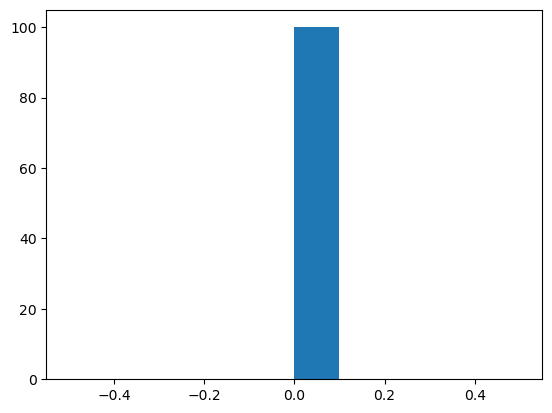

In [515]:
plt.hist(p_vector_3)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

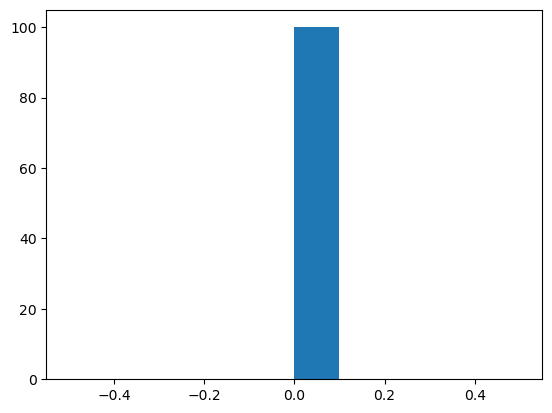

In [517]:
plt.hist(p_vector_4)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

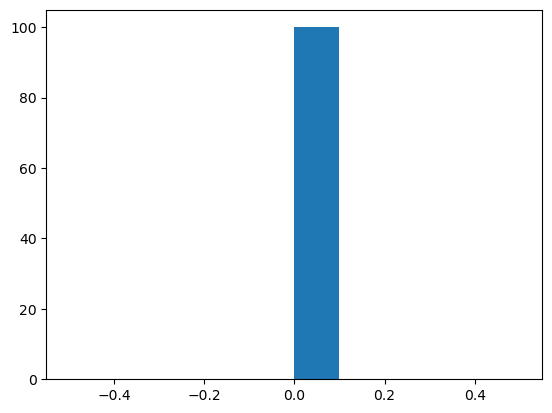

In [519]:
plt.hist(p_vector_5)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

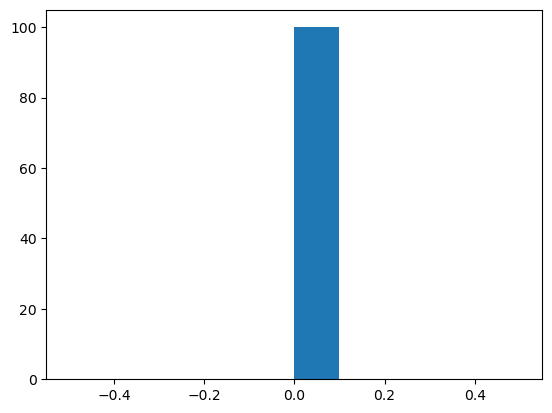

In [521]:
plt.hist(p_vector_6)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

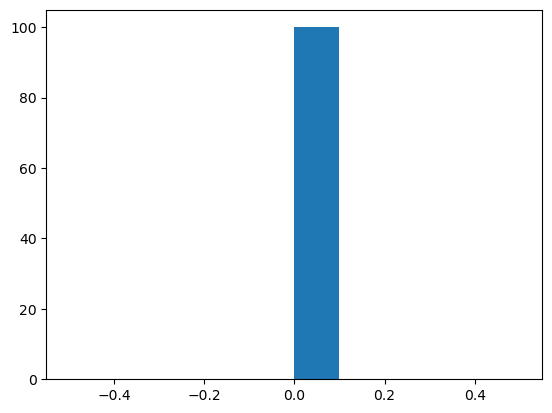

In [523]:
plt.hist(p_vector_7)